In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab
import scipy.misc as sci

In [2]:
def L_nj(x,x_i):
    L = []
    for n in range(len(x_i)):
        numer = np.ones(len(x))
        denom = np.ones(len(x))
        for i in range(len(x_i)):
            if i != n:
                a = x - x_i[i]
                numer = a*numer 
                b = x_i[n] - x_i[i]
                denom = b*denom   
        L.append(np.divide(numer,denom))
    return L

In [10]:
def L(u):
    global x_i
    global x
    numer = np.ones(len(x))
    denom = np.ones(len(x))
    for i in range(len(x_i)):
        if pt != x_i[i]:
            a = u - x_i[i]
            numer = a*numer 
            b = pt - x_i[i]
            denom = b*denom   
    return np.divide(numer,denom)

In [11]:
def dL(x,x_i):
    dL = []
    for k in range(len(x_i)):
        global pt
        pt = x_i[k]
        dL.append(sci.derivative(L,x_i[k],dx = 1e-15))
    return dL

In [12]:
def Hermit_interp(x,x_i,y_i,dy_i):
    
    H = []
    H_hat = []
    Lag = L_nj(x,x_i)
    dLag = dL(x,x_i)
    
    for j in range(len(x_i)):
        H.append((1-(2*(x-x_i[j])*dLag[j]))*np.power(Lag[j],2))
        H_hat.append((x-x_i[j])*np.power(Lag[j],2))
    
    ac = np.zeros(len(H[0]))
    for l in range(len(y_i)):
        ac = ac + H[l]*y_i[l] + H_hat[l]*dy_i[l]
    return ac



In [6]:
data = np.loadtxt('cmb_derivada.txt').T

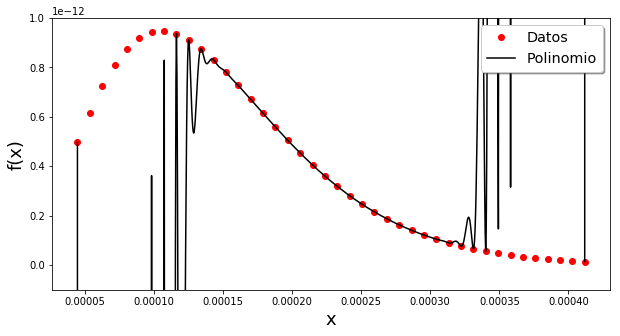

In [13]:
x_i = data[0]
y_i = data[1]
dy_i = data[2]

#x_i = [1.3,1.6,1.9]
#y_i = [0.6200860,0.4554022,0.2818186]
#dy_i = [-0.5220232,-0.5698959,-0.5811571]

x = np.linspace(np.min(x_i),np.max(x_i),1000)
P = Hermit_interp(x,x_i,y_i,dy_i)

plt.figure(figsize=(10,5))
plt.plot(x_i,y_i,'ro',label='Datos')
plt.plot(x,P,'k-' , label='Polinomio')

plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
#plt.xlim(0.00004,0.00010)
plt.ylim(-0.0000000000001,0.000000000001)
pylab.savefig('cmb_graf')
plt.show()